In [161]:
# Import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Data preprocessing

In [163]:
df = pd.read_csv('SPAM.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [164]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [165]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [166]:
mssgs = df['Category'].value_counts() # Naming the different diseases and counting how many times they appear in the column

mssgs_data = pd.DataFrame({'Message': mssgs.index,
                         'Counts': mssgs.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(mssgs_data) 

  Message  Counts
0     ham    4825
1    spam     747


Text(0, 0.5, 'Counts')

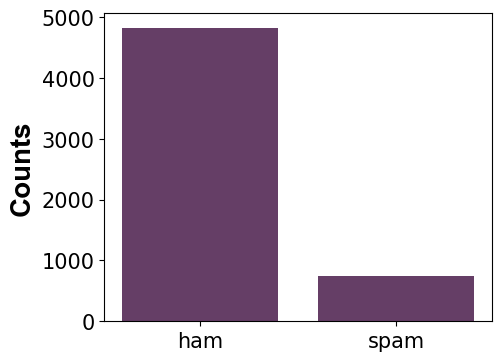

In [167]:
# Plotting the values in a bar plot for clearer understanding
plt.figure(figsize=(5, 4))
plt.bar(mssgs_data['Message'], mssgs_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Counts', fontsize = 20, fontweight='bold', **csfont)

#### The data is heavily imbalanced, and we have to solve this issue before feeding the model with the dataset. For numerical or categorical data, we usually use the mean and the mode, respectively, but in this case we have a bunch of different e-mails without any statistical parameter. For that reason, we are going to balance the dataset by downsampling the category with higher counts (ham in this case):

In [169]:
copy_original_df = df # Save the original dataframe 

ham_msg = df[df['Category'] == 'ham']        # Generate a dataframe with ham values
spam_msg = df[df['Category'] == 'spam']      # Generate a dataframe with spam values
ham_msg = ham_msg.sample(n = len(spam_msg), random_state = 19)   # Downsample the ham dataframe

df  = pd.concat([ham_msg, spam_msg]).reset_index(drop = True)       # Merge both dataframes into one

In [170]:
df.head()

,Category,Message
0,ham,I want to tell you how bad I feel that basical...
1,ham,2 and half years i missed your friendship:-)
2,ham,Cab is available.they pick up and drop at door...
3,ham,I'll be late...
4,ham,"I don,t think so. You don't need to be going o..."


#### Now the data is balanced

In [172]:
mssgs = df['Category'].value_counts() # Naming the different diseases and counting how many times they appear in the column

mssgs_data = pd.DataFrame({'Message': mssgs.index,
                         'Counts': mssgs.values}) # Store the information of the diseases into a DataFrame for a clearer view
print(mssgs_data) 

  Message  Counts
0     ham     747
1    spam     747


Text(0, 0.5, 'Counts')

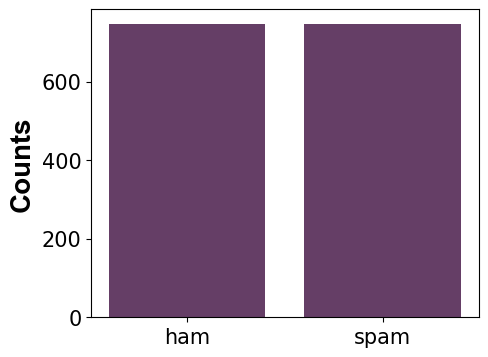

In [173]:
# Plotting the values in a bar plot for clearer understanding
plt.figure(figsize=(5, 4))
plt.bar(mssgs_data['Message'], mssgs_data['Counts'], color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Counts', fontsize = 20, fontweight='bold', **csfont)

#### We have to encode the categorical column with ham = 0 and spam = 1

In [175]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])

In [192]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Let's create a function designed to clean and preprocess text data. It will remove unnecesary characters (like punctuation), convert text to lowercase, and remove common English stopwords (like 'and', 'the', 'is', etc.), which do not contribute much to the meaning of the text.

In [194]:
def preprocess_text(text_data):
    preprocessed_text = []                                                       # Initialise an empty list for the sentences after cleaning
    
    for sentence in tqdm(text_data):                                             # Loop through each sentence in the input data (tqdm shows a progress bar)
        sentence = re.sub(r'[^\w\s]', '', sentence)                              # Replace all characters that are not word characters (\w) or spaces (\s) with an empty string
        preprocessed_text.append(' '.join(token.lower()                          # Puts the space-separated sencente into a list. token.lower converts each word to lowercase
                                  for token in str(sentence).split()             # split() splits the sentence into individual words
                                  if token not in stopwords.words('english')))   #stopwords.words filters outh words that are in the list of stopwords from NLTK

    return preprocessed_text

In [197]:
preprocessed_review = preprocess_text(df['Message'].values)
df['Message'] = preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████████| 1494/1494 [00:10<00:00, 140.06it/s]


## Exploratory Data Analysis

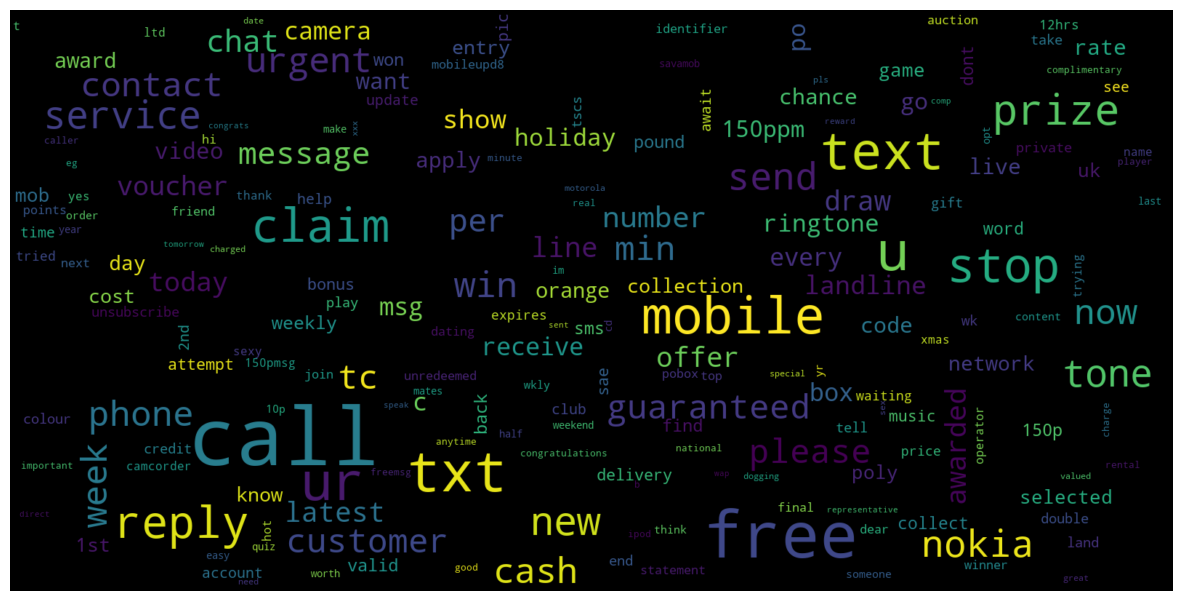

In [206]:
from wordcloud import WordCloud

consolidated = ' '.join(word for word in df['Message'][df['Category'] == 1].astype(str))
wordCloud = WordCloud(width = 1600, height = 800, random_state = 21, max_font_size = 110, collocations = False)

plt.figure(figsize = (15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [208]:
from collections import Counter

word_list = [word for sentence in preprocessed_review for word in sentence.split()]     # Flatten the list of sentences into a single list of words
word_counts = Counter(word_list)   # Count word frequencies
most_common_words = word_counts.most_common(20)   # Get the most common words
words, counts = zip(*most_common_words)    # Separate words and their frequencies

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'call'),
  Text(1, 0, 'u'),
  Text(2, 0, 'i'),
  Text(3, 0, 'free'),
  Text(4, 0, '2'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'txt'),
  Text(7, 0, '4'),
  Text(8, 0, 'you'),
  Text(9, 0, 'get'),
  Text(10, 0, 'text'),
  Text(11, 0, 'mobile'),
  Text(12, 0, 'stop'),
  Text(13, 0, 'claim'),
  Text(14, 0, 'reply'),
  Text(15, 0, 'im'),
  Text(16, 0, 'prize'),
  Text(17, 0, 'to'),
  Text(18, 0, 'send'),
  Text(19, 0, 'your')])

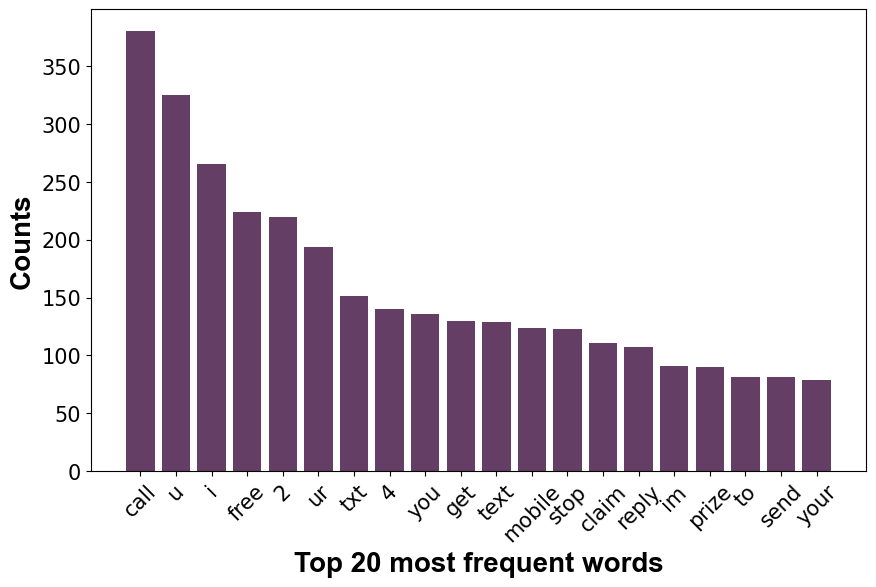

In [210]:
plt.figure(figsize = (10, 6))
plt.bar(words, counts, color = '#653e66')
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=15)
plt.ylabel('Counts', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Words', fontsize = 20, fontweight='bold', **csfont)
plt.xlabel('Top 20 most frequent words', fontsize = 20, fontweight='bold', **csfont)
plt.xticks(rotation = 45)

## Train/test split and text vectorisation

In [213]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Message'], df['Category'], test_size = 0.2, random_state = 19)

In [215]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
X_train = vectorization.fit_transform(X_train)
X_test = vectorization.transform(X_test)

## Model training

In [218]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

Accuracy Score (Logistic Regression model): 93.31103678929766 %


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

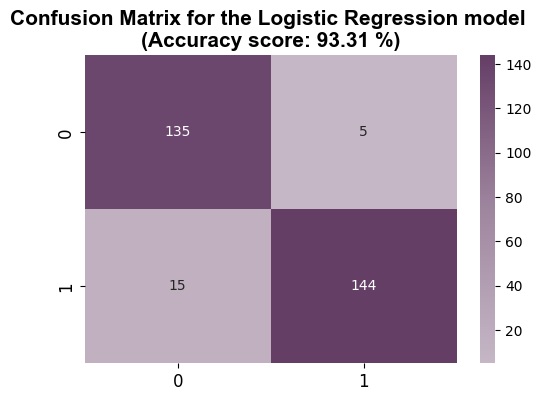

In [220]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy Score (Logistic Regression model):", accuracy_score(y_test, y_pred)*100, "%") # Print the accuracy score for the predictions

cm = confusion_matrix(y_test, y_pred)  # Generate the confusion matrix

from matplotlib.colors import LinearSegmentedColormap
colors = ["#c5b7c6", "#9f869f", "#653e66"]  # Light purple to dark purple
custom_cmap = LinearSegmentedColormap.from_list("purple_custom", colors) # Custom map for the confusion matrix

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot = True, fmt='d', cmap = custom_cmap)   # Plot the confusion matrix into a heatmap
csfont = {'fontname':'Arial'}
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title(f'Confusion Matrix for the Logistic Regression model \n(Accuracy score: {accuracy_score(y_test, y_pred)*100:.2f} %)', fontsize = 15, fontweight='bold', **csfont)
plt.tight_layout

## Single prediction

#### Let's try to predict if an email is SPAM:

In [233]:
email_test = """ 

Dear Valued Customer,

We are thrilled to inform you that you have been selected as the Grand Prize Winner in our Exclusive $1,000,000 Giveaway! 🎉

To claim your prize, all you need to do is:

Click on the secure link below:
Claim My Prize Now
Enter your personal details (name, email, phone number).
Confirm your entry by paying a small processing fee of $50.
Act fast! This offer is only valid for the next 24 hours. If we do not hear from you, your prize will be forfeited.

Don't miss out on this once-in-a-lifetime opportunity!

Best regards,
The Mega Rich Sweepstakes Team

P.S. Remember, this is 100% secure and approved by international financial institutions!



"""
test_df = pd.DataFrame([[email_test]], columns = ['Message'])

In [235]:
preprocessed_test = preprocess_text(test_df['Message'].values)
test_df['Message'] = preprocessed_test

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 22.28it/s]


In [237]:
X_news_test = vectorization.transform(test_df['Message'])

In [239]:
news_prediction = classifier.predict(X_news_test)

In [241]:
if news_prediction == 0:
    print('This email IS NOT SPAM.')
else:
    print('This email IS SPAM')

This email IS SPAM
